# **🍽️ Restaurant Tips Analysis**

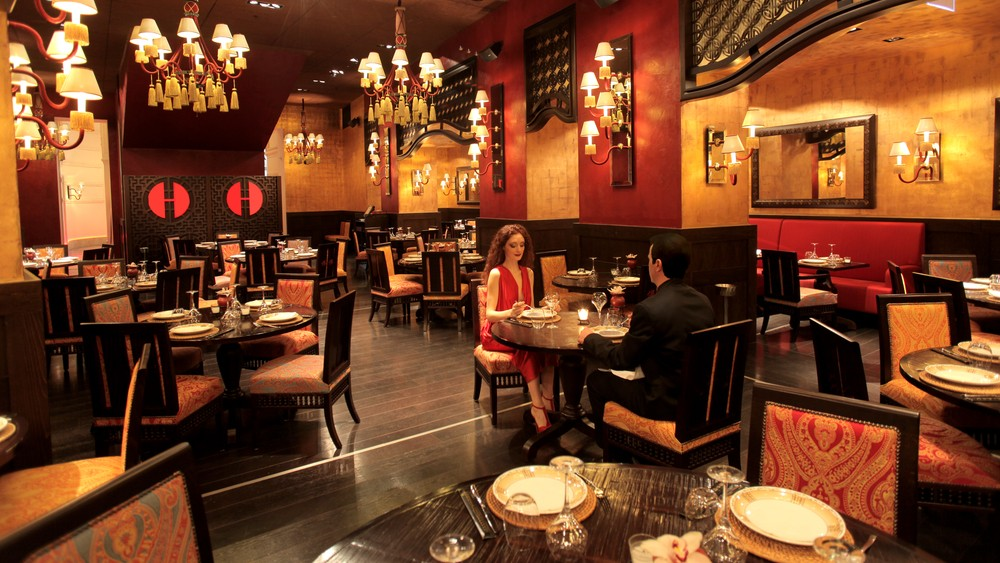

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# PUT YOUR CODE HERE
df=pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

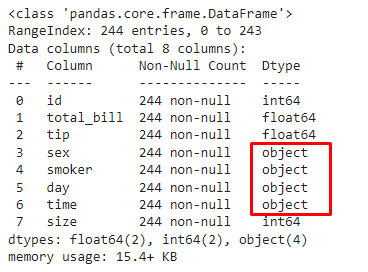

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
182,182,45.35,3.5,Male,Yes,Sun,Dinner,3
207,207,38.73,3.0,Male,Yes,Sat,Dinner,4
205,205,16.47,3.23,Female,Yes,Thur,Lunch,3
98,98,21.01,3.0,Male,Yes,Fri,Dinner,2
106,106,20.49,4.06,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
145,145,8.35,1.5,Female,No,Thur,Lunch,2
167,167,31.71,4.5,Male,No,Sun,Dinner,4
48,48,28.55,2.05,Male,No,Sun,Dinner,3
141,141,34.3,6.7,Male,No,Thur,Lunch,6
166,166,20.76,2.24,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1: People who don't smoke give tips no more than 9$
2. Insight 2: Mean & Median values of tips of smokers are higher than non-smokers

**General conclusion:** Smokers give more tips than non-smokers

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

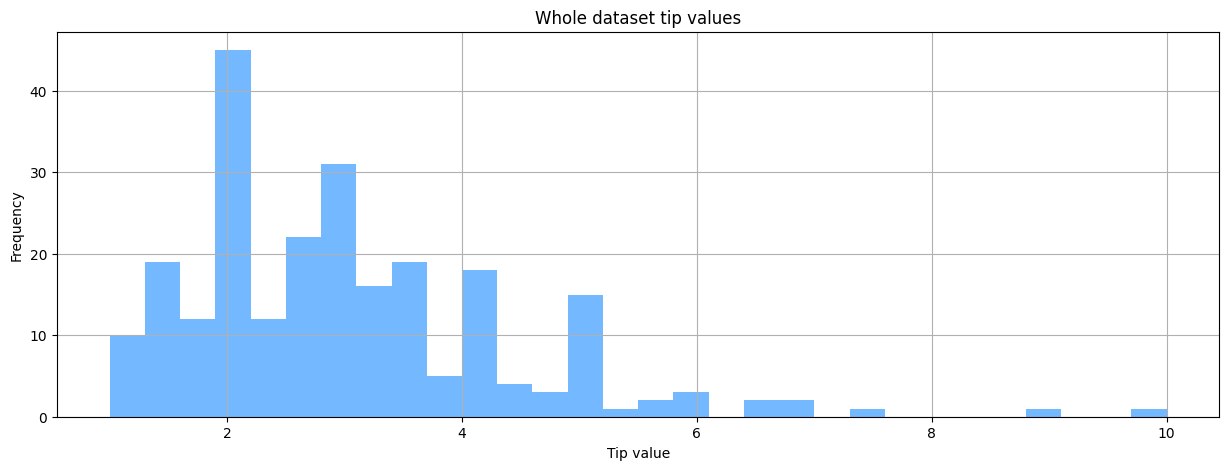

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(
    df['tip'],
    bins=30,
    color='#74b9ff',
)
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

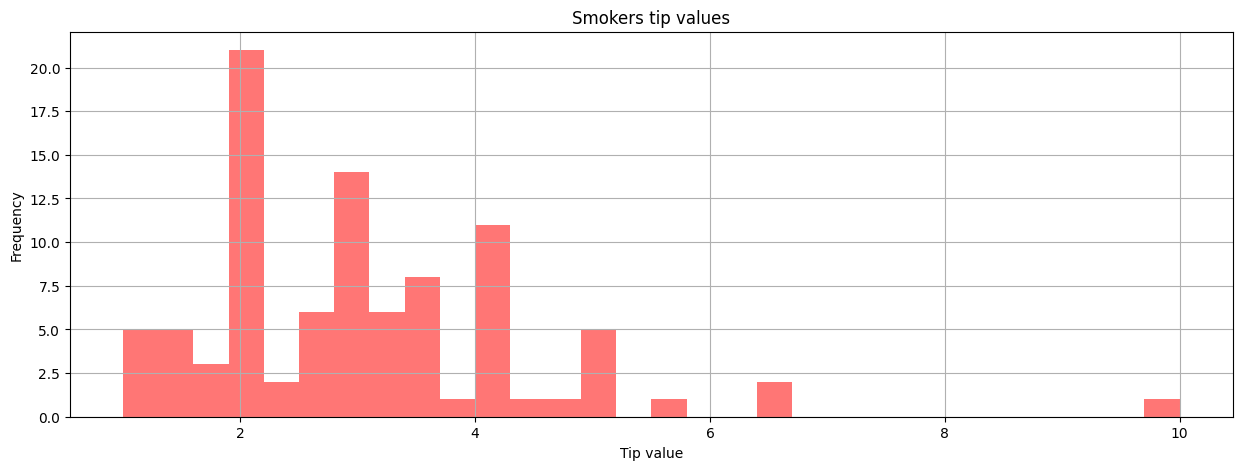

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(
    smokers_df['tip'],
    bins=30,
    color='#ff7675',
    linewidth=1
)
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

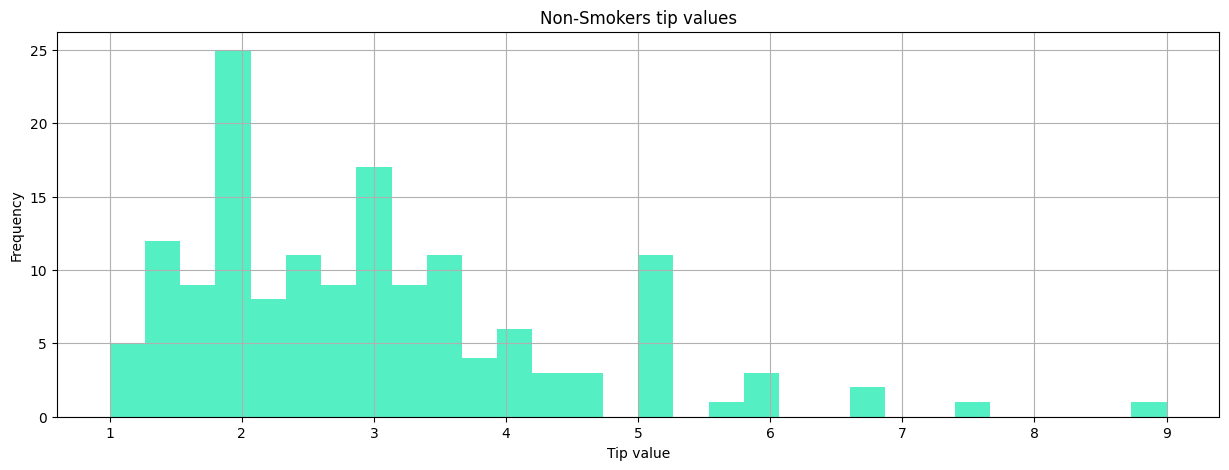

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(
    non_smokers_df['tip'],
    bins=30,
    color='#55efc4',
    linewidth=1
)
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-Smokers tip values')
plt.grid(True)
plt.show()

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

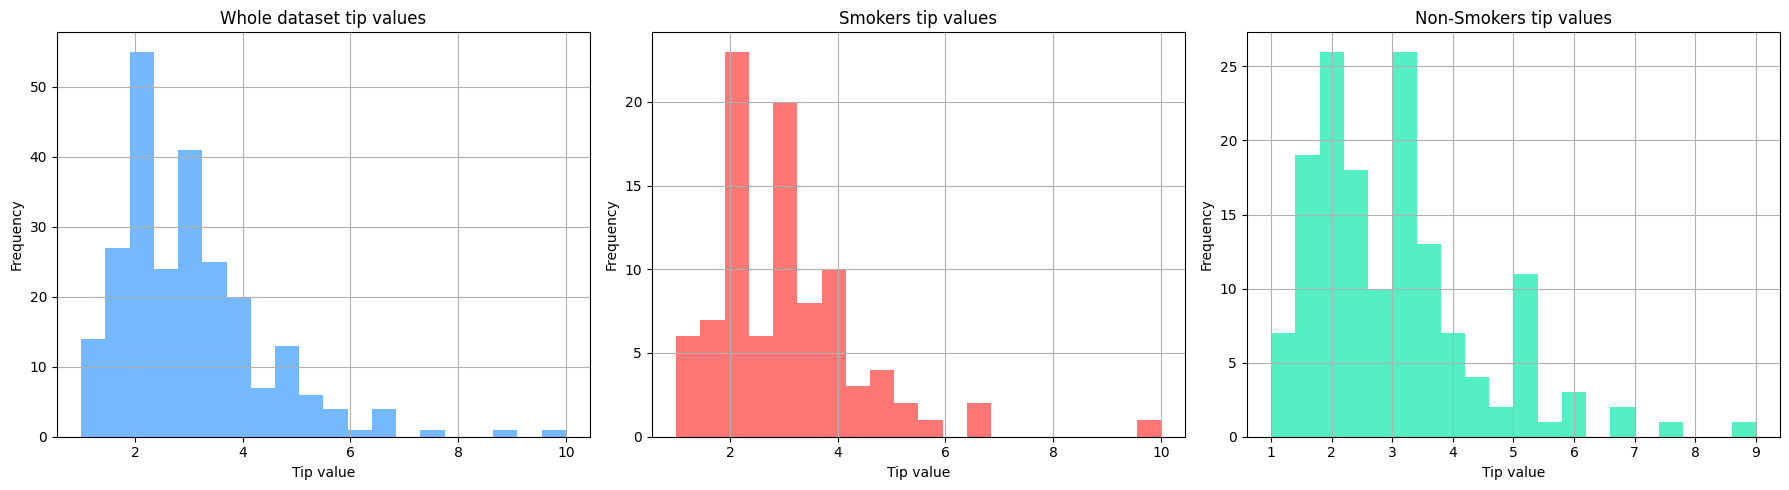

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Create a figure with 3 subplots in one row

# Plot the first histogram (Whole dataset)
axes[0].hist(
    df['tip'],
    bins=20,
    color='#74b9ff',
)
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)

# Plot the second histogram (Smokers)
axes[1].hist(
    smokers_df['tip'],
    bins=20,
    color='#ff7675',
    linewidth=1
)
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Smokers tip values')
axes[1].grid(True)

# Plot the third histogram (Non-smokers)
axes[2].hist(
    non_smokers_df['tip'],
    bins=20,
    color='#55efc4',
    linewidth=1
)
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Non-Smokers tip values')
axes[2].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1: Most customers give small tips (2–4 USD), and very few give large tips (>6 USD).

2. Insight 2: The tip distribution of non-smokers is more even compared to smokers.

3. Insight 3: Smokers tend to give lower and less diverse tips.

**General conclusion:** Non-smokers generally give higher and more varied tips, while smokers tend to give smaller and less diverse tips. Overall, most customers tip in the range of 2–4 USD, with large tips above 6 USD being rare.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

#### **Separate males and females**

In [ ]:
# Create a new dataframe 'males_df' containing only info about males.
males_df = df[df['sex'] == 'Male']
# Create another dataframe 'females_df' containing only females.
females_df = df[df['sex'] == 'Female']

#### **Compare their measures of central tendency**

##### **Measures of central tendency for the 'tip' column for males**

In [ ]:
# Calculate measures of central tendency for the 'tip' column for males.
males_tip_min = males_df['tip'].min()
males_tip_max = males_df['tip'].max()
males_tip_mean = males_df['tip'].mean()
males_tip_median = males_df['tip'].median()

# Make a list of values
males_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_values = map(lambda x: round(x, 4), males_values)

# Make a dataframe from the list
males_mct = pd.DataFrame(males_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
display(males_mct)

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **Measures of central tendency for the 'tip' column for females**

In [ ]:
# Calculate measures of central tendency for the 'tip' column for females.
females_tip_min = females_df['tip'].min()
females_tip_max = females_df['tip'].max()
females_tip_mean = females_df['tip'].mean()
females_tip_median = females_df['tip'].median()

# Make a list of values
females_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_values = map(lambda x: round(x, 4), females_values)

# Make a dataframe from the list
females_mct = pd.DataFrame(females_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
display(females_mct)

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [ ]:
alls_vals_dict = {
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Females': {'min': females_tip_min, 'max': females_tip_max, 'mean': females_tip_mean, 'median': females_tip_median}
}

# Make a dataframe
alls_mct = pd.DataFrame(alls_vals_dict)
# Output the dataframe
alls_mct

,Males,Females
min,1.000000,1.000000
max,10.000000,6.500000
mean,3.089618,2.833448
median,3.000000,2.750000


  1. Insight 1: Males give max 10\$ tips while Females give max 6.5\$
  2. Insight 2: Mean & Max values of males tips are higher than Females

**Conclusion**: Males tend to give more tips than Female

#### **Look at histograms**

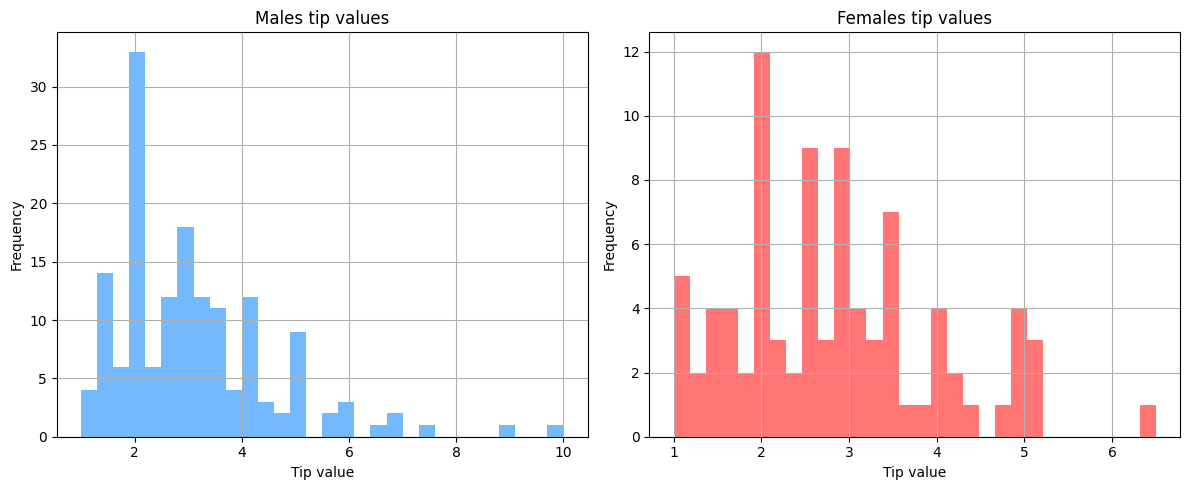

In [ ]:
# Plot histograms for males and females tips distribution side-by-side.
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Create a figure with 2 subplots in one row

# Plot the first histogram (Males)
axes[0].hist(
    males_df['tip'],
    bins=30,
    color='#74b9ff',
)
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Males tip values')
axes[0].grid(True)

# Plot the second histogram (Females)
axes[1].hist(
    females_df['tip'],
    bins=30,
    color='#ff7675',
    linewidth=1
)
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Females tip values')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Conclusion:**
        Males tend to tip more and with greater variation, including some very high tips.                         
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Both males and females tip around 2 USD      

### **📆 Do weekends bring more tips?**

#### **Separate weekends and weekdays:**

In [ ]:
weekdays_df = df[df['day'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])]
weekends_df = df[df['day'].isin(['Sat', 'Sun'])]

#### **Compare the measures of Central Tendency**

##### **Measures of central tendency for the 'tip' column for weekdays**

In [ ]:
# Calculate measures of central tendency for the 'tip' column for weekdays_df.
weekdays_tip_min = weekdays_df['tip'].min()
weekdays_tip_max = weekdays_df['tip'].max()
weekdays_tip_mean = weekdays_df['tip'].mean()
weekdays_tip_median = weekdays_df['tip'].median()

# Make a list of values
weekdays_values = [weekdays_tip_min, weekdays_tip_max, weekdays_tip_mean, weekdays_tip_median]
# Round all the values to 4 decimal places
weekdays_values = map(lambda x: round(x, 4), weekdays_values)

# Make a dataframe from the list
weekdays_mct = pd.DataFrame(weekdays_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
display(weekdays_mct)

,0
min,1.0000
max,4.7300
mean,2.7347
median,3.0000


##### **Measures of central tendency for the 'tip' column for weekends**

In [ ]:
# Calculate measures of central tendency for the 'tip' column for weekends_df.
weekends_tip_min = weekends_df['tip'].min()
weekends_tip_max = weekends_df['tip'].max()
weekends_tip_mean = weekends_df['tip'].mean()
weekends_tip_median = weekends_df['tip'].median()

# Make a list of values
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)

# Make a dataframe from the list
weekends_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
display(weekends_mct)

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [ ]:
allt_vals_dict = {
    'Weekdays': {'min': weekdays_tip_min, 'max': weekdays_tip_max, 'mean': weekdays_tip_mean, 'median': weekdays_tip_median},
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median}
}

# Make a dataframe
allt_mct = pd.DataFrame(allt_vals_dict)
# Output the dataframe
allt_mct

,Weekdays,Weekends
min,1.000000,1.000000
max,4.730000,10.000000
mean,2.734737,3.115276
median,3.000000,3.000000


  1. Insight 1: Customers who eat on weekends tip max 10 USD while customers who eat on weekdays tip no more than 4.73 USD
  2. Insight 2: Mean value of tips of customers eating on weekends is higher than customers eating on weekdays

**Conclusion**: Customers who eat on weekends tend to tip more.

#### **Look at histograms**

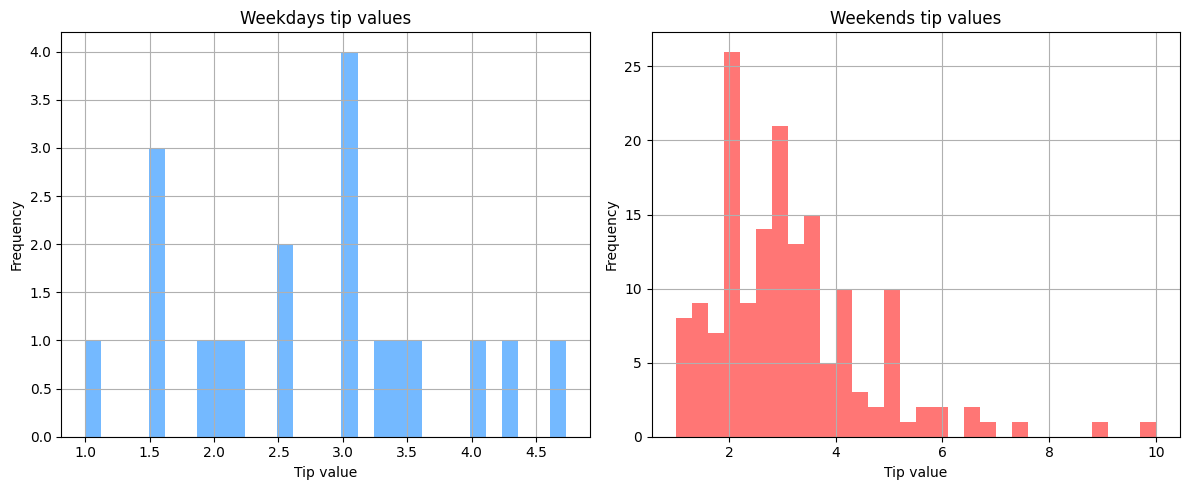

In [ ]:
# Plot histograms for males and females tips distribution side-by-side.
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Create a figure with 2 subplots in one row

# Plot the first histogram (Weekdays)
axes[0].hist(
    weekdays_df['tip'],
    bins=30,
    color='#74b9ff',
)
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Weekdays tip values')
axes[0].grid(True)

# Plot the second histogram (Weekends)
axes[1].hist(
    weekends_df['tip'],
    bins=30,
    color='#ff7675',
    linewidth=1
)
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Weekends tip values')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Conclusion:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Customers tip more and with greater variation on weekends (both in frequency and value).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On weekdays, tips are lower and more stable, with little fluctuation.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On weekends, tips are mostly around 2–3 USD, but several high-value outliers appear → indicating broader spending behavior.

### **🕑 Do dinners bring more tips?**

#### Separate dinner and lunch

In [ ]:
df_dinner = df[df['time'] == 'Dinner']
df_lunch = df[df['time'] == 'Lunch']

#### Compare the measures of central tendency

##### Measures of central tendency for the 'tip' column for df_dinner

In [ ]:
# Calculate measures of central tendency for the 'tip' column for df_dinner.
dinner_tip_min = df_dinner['tip'].min()
dinner_tip_max = df_dinner['tip'].max()
dinner_tip_mean = df_dinner['tip'].mean()
dinner_tip_median = df_dinner['tip'].median()

# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
display(dinner_mct)

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


#### Measures of central tendency for the 'tip' column for df_lunch

In [ ]:
# Calculate measures of central tendency for the 'tip' column for df_lunch.
lunch_tip_min = df_lunch['tip'].min()
lunch_tip_max = df_lunch['tip'].max()
lunch_tip_mean = df_lunch['tip'].mean()
lunch_tip_median = df_lunch['tip'].median()

# Make a list of values
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
# Round all the values to 4 decimal places
lunch_values = map(lambda x: round(x, 4), lunch_values)

# Make a dataframe from the list
lunch_mct = pd.DataFrame(lunch_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
display(lunch_mct)

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


In [ ]:
allm_vals_dict = {
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Lunch': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median}
}

# Make a dataframe
allm_mct = pd.DataFrame(allm_vals_dict)
# Output the dataframe
allm_mct

,Dinner,Lunch
min,1.00000,1.250000
max,10.00000,6.700000
mean,3.10267,2.728088
median,3.00000,2.250000


  1. Insight 1: Tips during Dinner are more varied, ranging from 1.0 to 10.0 USD while tips during lunch are ranging from 1.25 to 6.7 USD.
  2. Insight 2: Both Mean & Median values of tips during dinner are higher than lunch

**Conclusion**: Customers who eat dinner tend to give more tips than lunch

#### **Look at histograms**

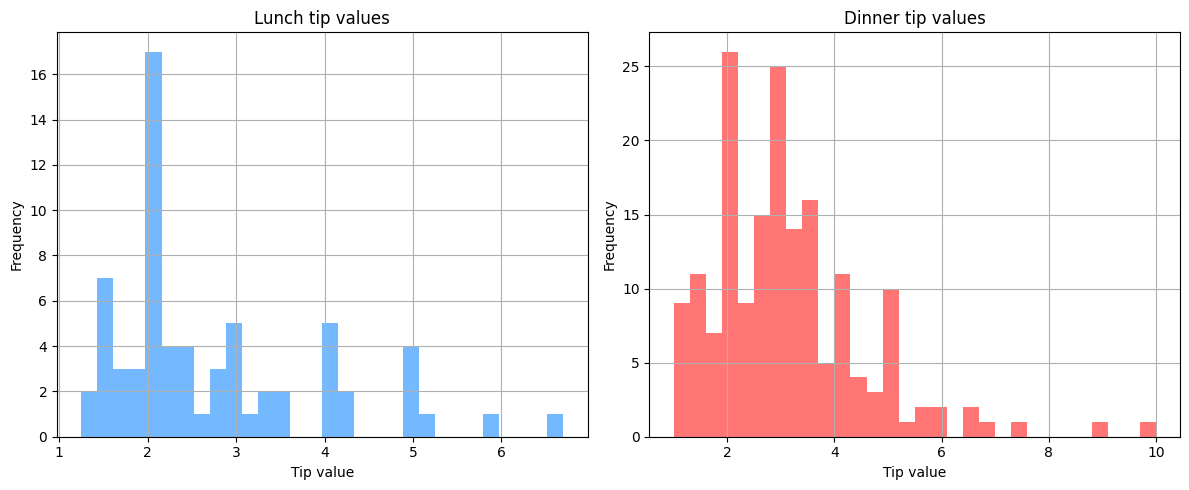

In [ ]:
# Plot histograms for males and females tips distribution side-by-side.
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Create a figure with 2 subplots in one row

# Plot the first histogram (Lunch)
axes[0].hist(
    df_lunch['tip'],
    bins=30,
    color='#74b9ff',
)
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Lunch tip values')
axes[0].grid(True)

# Plot the second histogram (Dinner)
axes[1].hist(
    df_dinner['tip'],
    bins=30,
    color='#ff7675',
    linewidth=1
)
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Dinner tip values')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Conclusion:**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lunch: Tips are mostly concentrated at lower levels (around 2 USD), with a narrow distribution and few high outliers.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dinner: The distribution is wider, ranging from 1 USD up to 10 USD, with more freqent high tips.  
=> Customers tend to tip more and with greater variation at dinner compared to lunch